# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
import citipy
import api_keys

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-2, high=25.000, size=1500)
lngs = np.random.uniform(low=-70.000, high=95.538, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

541

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [62]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Camocim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=camocim
Processing Record 2 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=bathsheba
Processing Record 3 | Razole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=razole
Processing Record 4 | Monrovia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=monrovia
Processing Record 5 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=sao filipe
Processing Record 6 | Kisangani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=kisangani
Processing Record 7 | Jijiga
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 57 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=taoudenni
Processing Record 58 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=tessalit
Processing Record 59 | Bauchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=bauchi
Processing Record 60 | Harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=harper
Processing Record 61 | Santa Isabel do Rio Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=santa isabel do rio negro
Processing Record 62 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=faya
Processing Record 63 | Cantaura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d8

Processing Record 113 | Biltine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=biltine
Processing Record 114 | Basse-Pointe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=basse-pointe
Processing Record 115 | Mbandaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=mbandaka
Processing Record 116 | Galle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=galle
Processing Record 117 | Bafoulabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=bafoulabe
Processing Record 118 | Abalak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=abalak
Processing Record 119 | The Valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614

Processing Record 169 | Umm Lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=umm lajj
Processing Record 170 | Bambari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=bambari
Processing Record 171 | Humberto de Campos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=humberto de campos
Processing Record 172 | Mugumu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=mugumu
Processing Record 173 | Kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=kattivakkam
Processing Record 174 | Ormara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=ormara
Processing Record 175 | Bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d

Processing Record 225 | Shahpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=shahpur
Processing Record 226 | Arroyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=arroyo
Processing Record 227 | Abha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=abha
Processing Record 228 | Rafai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=rafai
Processing Record 229 | Birao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=birao
Processing Record 230 | Porbandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=porbandar
Processing Record 231 | Buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=buchanan
Processin

Processing Record 281 | Homa Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=homa bay
Processing Record 282 | Adwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=adwa
Processing Record 283 | Oriximina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=oriximina
Processing Record 284 | Manadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=manadhoo
Processing Record 285 | Kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=kulhudhuffushi
City not found. Skipping...
City not found. Skipping...
Processing Record 286 | Goure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=goure
Processing Record 287 | Ouesso
http://api.openweathermap.org/data/2.5/weat

Processing Record 336 | Upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=upata
Processing Record 337 | Aden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=aden
City not found. Skipping...
City not found. Skipping...
Processing Record 338 | Dakar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=dakar
Processing Record 339 | Mabaruma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=mabaruma
Processing Record 340 | Carupano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=carupano
City not found. Skipping...
City not found. Skipping...
Processing Record 341 | Lafiagi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=lafiagi
Processing Record 342 | Doka
http://api.

Processing Record 391 | Bridgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=bridgetown
Processing Record 392 | Raigarh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=raigarh
Processing Record 393 | Barddhaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=barddhaman
Processing Record 394 | Akodia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=akodia
Processing Record 395 | Kassala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=kassala
Processing Record 396 | Nola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=nola
Processing Record 397 | Timbuktu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=to

Processing Record 447 | Obo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=obo
Processing Record 448 | Pallipattu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=pallipattu
Processing Record 449 | Mongo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=mongo
Processing Record 450 | Latehar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=latehar
Processing Record 451 | Afzalpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=afzalpur
Processing Record 452 | Rey Bouba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=rey bouba
Processing Record 453 | Bama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd50c2e2a86193d88afeccceee614cb5&q=bama
Proce

In [28]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
# mkdir Output_CSV


In [42]:
# mkdir Output_Plots

In [36]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Semme,0,FR,1560207602,81,46.20,1.50,51.01,3.36
1,Cravo Norte,100,CO,1560207604,97,6.30,-70.20,73.49,3.51
2,Wanlaweyn,100,SO,1560207606,84,2.62,44.89,75.47,9.66
3,Hambantota,100,LK,1560207607,81,6.12,81.12,83.57,16.73
4,Mahibadhoo,100,MV,1560207609,80,3.78,72.97,83.03,11.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

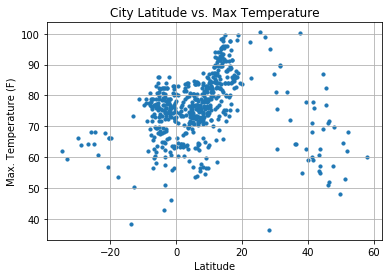

In [44]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

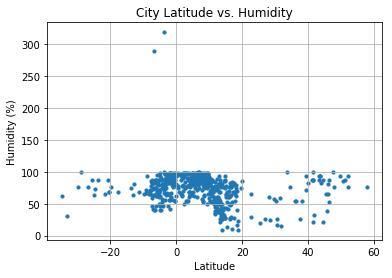

In [45]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

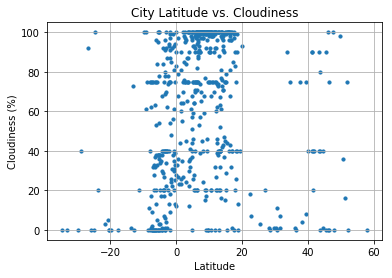

In [46]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

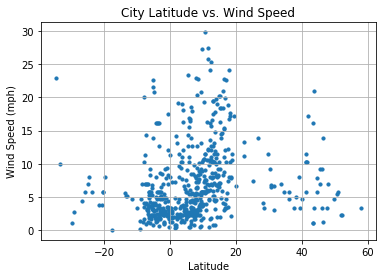

In [47]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()